In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing the csv data files  
df_may = pd.read_csv("GP01_Electricity/property1-may-2020-usage.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_may.head())

df_june = pd.read_csv("GP01_Electricity/property1-jun-2020-usage.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_june.head())

df_jul = pd.read_csv("GP01_Electricity/property1-jul-2020-usage.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_jul.head())

df_aug = pd.read_csv("GP01_Electricity/property1-aug-2020-usage.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_aug.head())

df_sep = pd.read_csv("GP01_Electricity/proterty1-sep-2020-usage.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_sep.head())

df_oct = pd.read_csv("GP01_Electricity/property1-oct-2020-usage.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_oct.head())

df_nov = pd.read_csv("GP01_Electricity/property1-nov-2020-usage.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_nov.head())

df_dec = pd.read_csv("GP01_Electricity/property1-dec-2020-usage.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_dec.head())

df_jan = pd.read_csv("GP01_Electricity/property1-jan-2021-usage.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_jan.head())

df_feb = pd.read_csv("GP01_Electricity/property1-feb-2021-usage.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_feb.head())

     READ DATE CONSUMPTION(KWH) SOLD TO GRID(KWH)
0  01 May 2020    Not available     Not available
1  02 May 2020    Not available     Not available
2  03 May 2020    Not available     Not available
3  04 May 2020    Not available     Not available
4  05 May 2020    Not available     Not available
      READ DATE  CONSUMPTION(KWH)  SOLD TO GRID(KWH)
0  01 June 2020              0.27               0.20
1  02 June 2020              0.32               0.27
2  03 June 2020              0.27               0.43
3  04 June 2020              4.22               0.34
4  05 June 2020              0.26               0.48
      READ DATE  CONSUMPTION(KWH)  SOLD TO GRID(KWH)
0  01 July 2020             10.09               0.41
1  02 July 2020              4.24               0.34
2  03 July 2020             12.06               0.11
3  04 July 2020             11.90               0.21
4  05 July 2020             15.27               0.24
        READ DATE  CONSUMPTION(KWH)  SOLD TO GRID(KWH)
0  01 Aug

In [2]:
#data checking for individual files
df_list = [df_may,df_june,df_jul,df_aug,df_sep,df_oct,df_nov,df_dec,df_jan,df_feb]
i = 5
j = 1
for df in df_list:
    if i <= 12:
        print("Data information for month", i, "year 2020")
        i = i+1
    else:
        print("Data information for month", j, "year 2021")
        j = j+1
    print(df.shape)#dimension
    print(df.info())#information about columns
    print(df.isnull().any())#columns with null values
    print(df.describe(include='all'))#Summary statistics
    print("----------------------------------")

Data information for month 5 year 2020
(31, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
READ DATE            31 non-null object
CONSUMPTION(KWH)     31 non-null object
SOLD TO GRID(KWH)    31 non-null object
dtypes: object(3)
memory usage: 872.0+ bytes
None
READ DATE            False
CONSUMPTION(KWH)     False
SOLD TO GRID(KWH)    False
dtype: bool
          READ DATE CONSUMPTION(KWH) SOLD TO GRID(KWH)
count            31               31                31
unique           31               17                17
top     19 May 2020    Not available              0.00
freq              1                6                 7
----------------------------------
Data information for month 6 year 2020
(30, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
READ DATE            30 non-null object
CONSUMPTION(KWH)     30 non-null float64
SOLD TO GRID(KWH)    30 non-null float64
dtypes:

None
READ DATE            False
CONSUMPTION(KWH)     False
SOLD TO GRID(KWH)    False
dtype: bool
              READ DATE  CONSUMPTION(KWH)  SOLD TO GRID(KWH)
count                31         31.000000          31.000000
unique               31               NaN                NaN
top     15 January 2021               NaN                NaN
freq                  1               NaN                NaN
mean                NaN          3.721613          12.555161
std                 NaN          1.688674           4.805730
min                 NaN          1.640000           1.970000
25%                 NaN          2.500000          10.165000
50%                 NaN          3.300000          13.610000
75%                 NaN          4.355000          16.220000
max                 NaN          9.230000          19.090000
----------------------------------
Data information for month 2 year 2021
(28, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (tota

In [3]:
#Finding Missing values for may 2020
miss_may=df_may[(df_may['SOLD TO GRID(KWH)'] == "Not available") | (df_may['CONSUMPTION(KWH)'] == "Not available")]
print(miss_may)#finding missing values

     READ DATE CONSUMPTION(KWH) SOLD TO GRID(KWH)
0  01 May 2020    Not available     Not available
1  02 May 2020    Not available     Not available
2  03 May 2020    Not available     Not available
3  04 May 2020    Not available     Not available
4  05 May 2020    Not available     Not available
5  06 May 2020    Not available     Not available


In [4]:
#Treating Missing values for may 2020
df_may = df_may[df_may['SOLD TO GRID(KWH)']!= 'Not available']#removing rows with not available values
print(df_may.shape)

(25, 3)


In [5]:
df_may["SOLD TO GRID(KWH)"] = pd.to_numeric(df_may["SOLD TO GRID(KWH)"])#converting to float
df_may["CONSUMPTION(KWH)"] = pd.to_numeric(df_may["CONSUMPTION(KWH)"])#converting to float
print(df_may.describe())

       CONSUMPTION(KWH)  SOLD TO GRID(KWH)
count         25.000000          25.000000
mean           0.320400           0.349200
std            0.081214           0.260815
min            0.220000           0.000000
25%            0.250000           0.000000
50%            0.320000           0.430000
75%            0.350000           0.530000
max            0.520000           0.720000


In [6]:
#Finding Missing values for feb 2021
miss_feb=df_feb[(df_feb['SOLD TO GRID(KWH)'] == "Not available") | (df_feb['CONSUMPTION(KWH)'] == "Not available")]
print(miss_feb)

           READ DATE CONSUMPTION(KWH) SOLD TO GRID(KWH)
23  24 February 2021    Not available     Not available
24  25 February 2021    Not available     Not available
25  26 February 2021    Not available     Not available
26  27 February 2021    Not available     Not available
27  28 February 2021    Not available     Not available


In [7]:
#Treating Missing values for feb 2021
df_feb = df_feb[df_feb['SOLD TO GRID(KWH)']!= 'Not available']#removing rows with not available values
print(df_feb.shape)

(23, 3)


In [8]:
df_feb["SOLD TO GRID(KWH)"] = pd.to_numeric(df_feb["SOLD TO GRID(KWH)"])#converting to float
df_feb["CONSUMPTION(KWH)"] = pd.to_numeric(df_feb["CONSUMPTION(KWH)"])
print(df_feb.describe())

       CONSUMPTION(KWH)  SOLD TO GRID(KWH)
count         23.000000          23.000000
mean           3.327826          11.183913
std            1.296302           3.755270
min            1.990000           3.540000
25%            2.525000           8.830000
50%            3.020000          10.440000
75%            3.545000          12.845000
max            6.660000          18.660000


Text(0, 0.5, 'Electricity sold to grid')

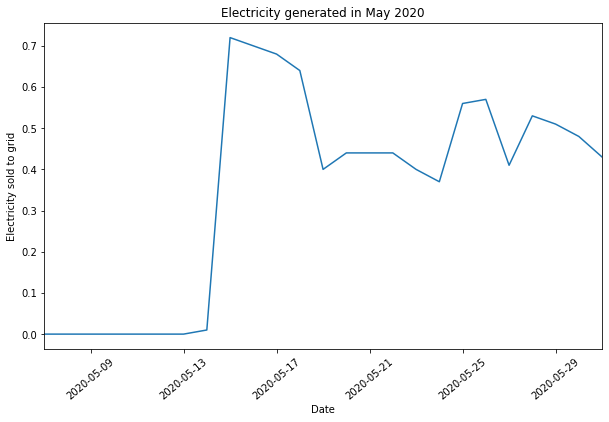

In [9]:
#line plot for power sold to grid in May 2020

df_may["READ DATE"] = pd.to_datetime(df_may["READ DATE"])##converting to datetime format
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_may["READ DATE"], df_may['SOLD TO GRID(KWH)'])

# X-axis
plt.setp(ax.get_xticklabels(), rotation=40)
ax.set_xlim(df_may["READ DATE"].values[0], df_may["READ DATE"].values[-1])

# Labels
ax.set_title("Electricity generated in May 2020")
ax.set_xlabel('Date')
ax.set_ylabel('Electricity sold to grid')

Text(0, 0.5, 'Electricity sold to grid')

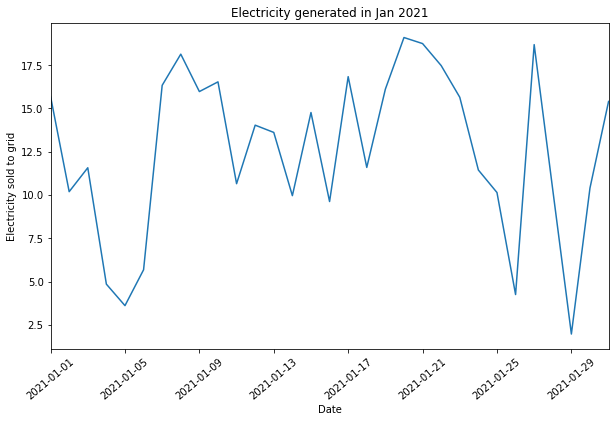

In [10]:
#line plot for power sold to grid in Jan 2021

df_jan["READ DATE"] = pd.to_datetime(df_jan["READ DATE"])
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_jan["READ DATE"], df_jan['SOLD TO GRID(KWH)'])

# X-axis
plt.setp(ax.get_xticklabels(), rotation=40)
ax.set_xlim(df_jan["READ DATE"].values[0], df_jan["READ DATE"].values[-1])

# Labels
ax.set_title("Electricity generated in Jan 2021")
ax.set_xlabel('Date')
ax.set_ylabel('Electricity sold to grid')

In [11]:
##Concatenating all the dataframes
df = pd.concat([df_may,df_june,df_jul,df_aug,df_sep,df_oct,df_nov,df_dec,df_jan,df_feb], join='outer',ignore_index = True)
print(df.head(5))
print(df.shape)
print(df.info())

             READ DATE  CONSUMPTION(KWH)  SOLD TO GRID(KWH)
0  2020-05-07 00:00:00              0.29                0.0
1  2020-05-08 00:00:00              0.34                0.0
2  2020-05-09 00:00:00              0.41                0.0
3  2020-05-10 00:00:00              0.52                0.0
4  2020-05-11 00:00:00              0.35                0.0
(293, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 3 columns):
READ DATE            293 non-null object
CONSUMPTION(KWH)     293 non-null float64
SOLD TO GRID(KWH)    293 non-null float64
dtypes: float64(2), object(1)
memory usage: 7.0+ KB
None


In [12]:
df["READ DATE"] = pd.to_datetime(df["READ DATE"])#converting to datetime format
print(df.head())
print(df.shape)
print(df.info())
print(df.describe(include='all'))

   READ DATE  CONSUMPTION(KWH)  SOLD TO GRID(KWH)
0 2020-05-07              0.29                0.0
1 2020-05-08              0.34                0.0
2 2020-05-09              0.41                0.0
3 2020-05-10              0.52                0.0
4 2020-05-11              0.35                0.0
(293, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 3 columns):
READ DATE            293 non-null datetime64[ns]
CONSUMPTION(KWH)     293 non-null float64
SOLD TO GRID(KWH)    293 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.0 KB
None
                  READ DATE  CONSUMPTION(KWH)  SOLD TO GRID(KWH)
count                   293        293.000000         293.000000
unique                  293               NaN                NaN
top     2020-05-14 00:00:00               NaN                NaN
freq                      1               NaN                NaN
first   2020-05-07 00:00:00               NaN                NaN


Text(0, 0.5, 'Power sold to grid')

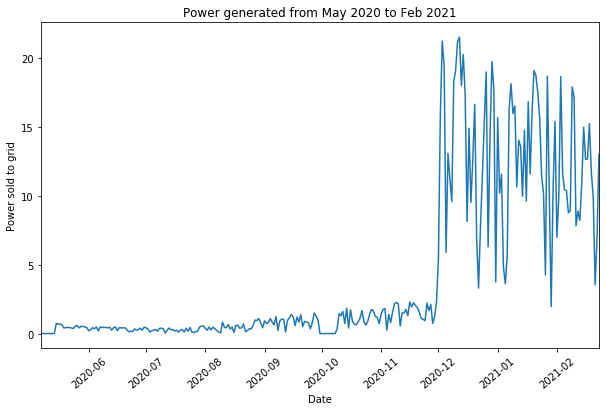

In [13]:
#line plot for combined dataset
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df["READ DATE"], df['SOLD TO GRID(KWH)'])

# X-axis
plt.setp(ax.get_xticklabels(), rotation=40)
ax.set_xlim(df["READ DATE"].values[0], df["READ DATE"].values[-1])

# Labels
ax.set_title("Power generated from May 2020 to Feb 2021")
ax.set_xlabel('Date')
ax.set_ylabel('Power sold to grid')

year_month
2020-05      8.73
2020-06     10.35
2020-07      8.38
2020-08     14.30
2020-09     26.15
2020-10     25.54
2020-11     47.35
2020-12    424.90
2021-01    389.21
2021-02    257.23
Name: SOLD TO GRID(KWH), dtype: float64


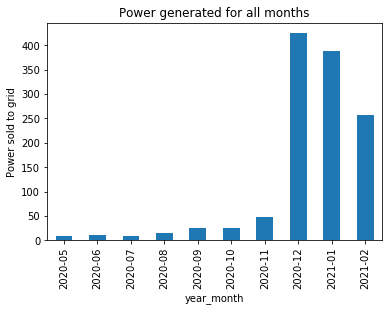

In [14]:
#bar chart to show the power generated in each month
df['year_month'] = df['READ DATE'].dt.strftime('%Y-%m')

dfs = df.groupby('year_month')["SOLD TO GRID(KWH)"].sum()
print(dfs)
dfs.plot(x="year_month", y="SOLD TO GRID(KWH)", kind="bar")
plt.ylabel("Power sold to grid")
plt.title("Power generated for all months")
plt.show()

In [15]:
# Importing the csv files for Temperature data
# This dataset was downloaded from Bureau of Meterology
# http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_nccObsCode=122&p_display_type=dailyDataFile&p_startYear=2020&p_c=-1488383012&p_stn_num=086266

temp_may = pd.read_csv("Temperature/May_2020.csv",error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Max_Temperature"])
print(temp_may.head())

temp_jun = pd.read_csv("Temperature/Jun_2020.csv",error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Max_Temperature"])
print(temp_jun.head())

temp_jul = pd.read_csv("Temperature/Jul_2020.csv",error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Max_Temperature"])
print(temp_jul.head())

temp_aug = pd.read_csv("Temperature/Aug_2020.csv",error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Max_Temperature"])
print(temp_aug.head())

temp_sep = pd.read_csv("Temperature/Sep_2020.csv",error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Max_Temperature"])
print(temp_sep.head())

temp_oct = pd.read_csv("Temperature/Oct_2020.csv",error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Max_Temperature"])
print(temp_oct.head())

temp_nov = pd.read_csv("Temperature/Nov_2020.csv",error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Max_Temperature"])
print(temp_nov.head())

temp_dec = pd.read_csv("Temperature/Dec_2020.csv",error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Max_Temperature"])
print(temp_dec.head())

temp_jan = pd.read_csv("Temperature/Jan_2021.csv",error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Max_Temperature"])
print(temp_jan.head())

temp_feb = pd.read_csv("Temperature/Feb_2021.csv",error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Max_Temperature"])
print(temp_feb.head())

   Date  Max_Temperature
0     1              6.4
1     2              8.6
2     3             10.4
3     4             12.8
4     5             15.6
   Date  Max_Temperature
0     1              7.6
1     2              9.1
2     3              9.4
3     4             10.4
4     5             11.2
   Date  Max_Temperature
0     1              NaN
1     2             10.2
2     3              6.5
3     4              8.4
4     5              7.9
   Date  Max_Temperature
0     1             12.4
1     2             14.0
2     3             11.6
3     4              4.5
4     5              7.3
   Date  Max_Temperature
0     1             12.1
1     2             17.4
2     3             15.2
3     4             12.7
4     5             12.7
   Date  Max_Temperature
0     1             14.5
1     2             21.4
2     3             24.1
3     4             25.0
4     5              8.6
   Date  Max_Temperature
0     1             17.6
1     2             25.1
2     3             25.8


In [16]:
# Adding prefix to date column
temp_may['Date'] = '2020-05-' + temp_may['Date'].astype(str)
print(temp_may.head())
temp_jun['Date'] = '2020-06-' + temp_jun['Date'].astype(str)
print(temp_jun.head())
temp_jul['Date'] = '2020-07-' + temp_jul['Date'].astype(str)
print(temp_jul.head())
temp_aug['Date'] = '2020-08-' + temp_aug['Date'].astype(str)
print(temp_aug.head())
temp_sep['Date'] = '2020-09-' + temp_sep['Date'].astype(str)
print(temp_sep.head())
temp_oct['Date'] = '2020-10-' + temp_oct['Date'].astype(str)
print(temp_oct.head())
temp_nov['Date'] = '2020-11-' + temp_nov['Date'].astype(str)
print(temp_nov.head())
temp_dec['Date'] = '2020-12-' + temp_dec['Date'].astype(str)
print(temp_dec.head())
temp_jan['Date'] = '2021-01-' + temp_jan['Date'].astype(str)
print(temp_jan.head())
temp_feb['Date'] = '2021-02-' + temp_feb['Date'].astype(str)
print(temp_feb.head())

        Date  Max_Temperature
0  2020-05-1              6.4
1  2020-05-2              8.6
2  2020-05-3             10.4
3  2020-05-4             12.8
4  2020-05-5             15.6
        Date  Max_Temperature
0  2020-06-1              7.6
1  2020-06-2              9.1
2  2020-06-3              9.4
3  2020-06-4             10.4
4  2020-06-5             11.2
        Date  Max_Temperature
0  2020-07-1              NaN
1  2020-07-2             10.2
2  2020-07-3              6.5
3  2020-07-4              8.4
4  2020-07-5              7.9
        Date  Max_Temperature
0  2020-08-1             12.4
1  2020-08-2             14.0
2  2020-08-3             11.6
3  2020-08-4              4.5
4  2020-08-5              7.3
        Date  Max_Temperature
0  2020-09-1             12.1
1  2020-09-2             17.4
2  2020-09-3             15.2
3  2020-09-4             12.7
4  2020-09-5             12.7
        Date  Max_Temperature
0  2020-10-1             14.5
1  2020-10-2             21.4
2  2020-10

In [17]:
# Converting to date time format for column Date:
temp_may["Date"] = pd.to_datetime(temp_may["Date"])
print(temp_may.dtypes)
temp_jun["Date"] = pd.to_datetime(temp_jun["Date"])
print(temp_jun.dtypes)
temp_jul["Date"] = pd.to_datetime(temp_jul["Date"])
print(temp_jul.dtypes)
temp_aug["Date"] = pd.to_datetime(temp_aug["Date"])
print(temp_aug.dtypes)
temp_sep["Date"] = pd.to_datetime(temp_sep["Date"])
print(temp_sep.dtypes)
temp_oct["Date"] = pd.to_datetime(temp_oct["Date"])
print(temp_oct.dtypes)
temp_nov["Date"] = pd.to_datetime(temp_nov["Date"])
print(temp_nov.dtypes)
temp_dec["Date"] = pd.to_datetime(temp_dec["Date"])
print(temp_dec.dtypes)
temp_jan["Date"] = pd.to_datetime(temp_jan["Date"])
print(temp_jan.dtypes)
temp_feb["Date"] = pd.to_datetime(temp_feb["Date"])
print(temp_feb.dtypes)

Date               datetime64[ns]
Max_Temperature           float64
dtype: object
Date               datetime64[ns]
Max_Temperature           float64
dtype: object
Date               datetime64[ns]
Max_Temperature           float64
dtype: object
Date               datetime64[ns]
Max_Temperature           float64
dtype: object
Date               datetime64[ns]
Max_Temperature           float64
dtype: object
Date               datetime64[ns]
Max_Temperature           float64
dtype: object
Date               datetime64[ns]
Max_Temperature           float64
dtype: object
Date               datetime64[ns]
Max_Temperature           float64
dtype: object
Date               datetime64[ns]
Max_Temperature           float64
dtype: object
Date               datetime64[ns]
Max_Temperature           float64
dtype: object


In [18]:
# Merging all the temperature dataframes into a single dataframe:
df_temperature = pd.concat([temp_may,temp_jun,temp_jul,temp_aug,temp_sep,temp_oct,temp_nov,temp_dec,temp_jan,temp_feb], join='outer',ignore_index = True)
print(df_temperature)
print(df_temperature.shape)
print(df_temperature.info())

          Date  Max_Temperature
0   2020-05-01              6.4
1   2020-05-02              8.6
2   2020-05-03             10.4
3   2020-05-04             12.8
4   2020-05-05             15.6
..         ...              ...
299 2021-02-24             18.4
300 2021-02-25             20.6
301 2021-02-26             16.3
302 2021-02-27             17.0
303 2021-02-28             24.7

[304 rows x 2 columns]
(304, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
Date               304 non-null datetime64[ns]
Max_Temperature    303 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.9 KB
None


In [19]:
df = df.rename(columns={'READ DATE': 'Date'})
df

,Date,CONSUMPTION(KWH),SOLD TO GRID(KWH),year_month
0,2020-05-07,0.29,0.00,2020-05
1,2020-05-08,0.34,0.00,2020-05
2,2020-05-09,0.41,0.00,2020-05
3,2020-05-10,0.52,0.00,2020-05
4,2020-05-11,0.35,0.00,2020-05
...,...,...,...,...
288,2021-02-19,3.66,11.73,2021-02
289,2021-02-20,3.04,9.94,2021-02
290,2021-02-21,2.54,3.54,2021-02
291,2021-02-22,3.43,6.92,2021-02


In [20]:
dfinal_temp = df.merge(df_temperature, on = "Date", how = 'inner')
dfinal_temp

,Date,CONSUMPTION(KWH),SOLD TO GRID(KWH),year_month,Max_Temperature
0,2020-05-07,0.29,0.00,2020-05,17.6
1,2020-05-08,0.34,0.00,2020-05,14.6
2,2020-05-09,0.41,0.00,2020-05,10.0
3,2020-05-10,0.52,0.00,2020-05,9.5
4,2020-05-11,0.35,0.00,2020-05,11.7
...,...,...,...,...,...
288,2021-02-19,3.66,11.73,2021-02,27.9
289,2021-02-20,3.04,9.94,2021-02,28.6
290,2021-02-21,2.54,3.54,2021-02,16.9
291,2021-02-22,3.43,6.92,2021-02,19.1


In [21]:
# Checking for null values:
print(dfinal_temp.isnull().sum())
# Dropping one row that has null value
dfinal_temp = dfinal_temp.dropna()
dfinal_temp

Date                 0
CONSUMPTION(KWH)     0
SOLD TO GRID(KWH)    0
year_month           0
Max_Temperature      1
dtype: int64


,Date,CONSUMPTION(KWH),SOLD TO GRID(KWH),year_month,Max_Temperature
0,2020-05-07,0.29,0.00,2020-05,17.6
1,2020-05-08,0.34,0.00,2020-05,14.6
2,2020-05-09,0.41,0.00,2020-05,10.0
3,2020-05-10,0.52,0.00,2020-05,9.5
4,2020-05-11,0.35,0.00,2020-05,11.7
...,...,...,...,...,...
288,2021-02-19,3.66,11.73,2021-02,27.9
289,2021-02-20,3.04,9.94,2021-02,28.6
290,2021-02-21,2.54,3.54,2021-02,16.9
291,2021-02-22,3.43,6.92,2021-02,19.1


Text(0, 0.5, 'Maximum temperature')

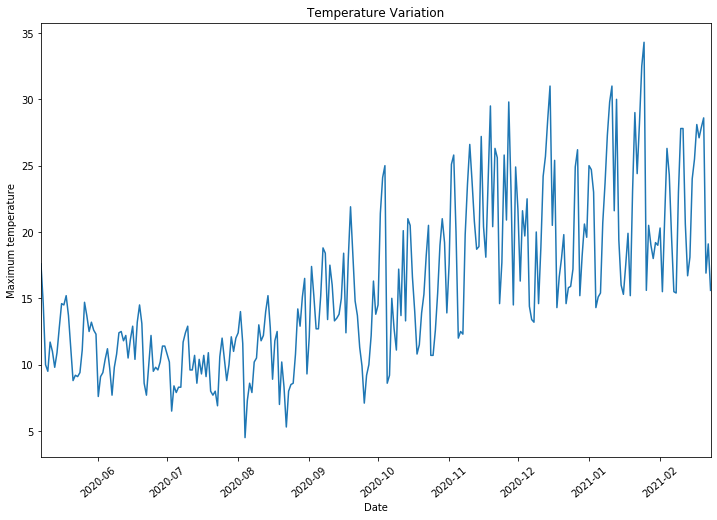

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(dfinal_temp["Date"], dfinal_temp['Max_Temperature'])

# X-axis
plt.setp(ax.get_xticklabels(), rotation=40)
ax.set_xlim(dfinal_temp["Date"].values[0], dfinal_temp["Date"].values[-1])

# Labels
ax.set_title("Temperature Variation")
ax.set_xlabel('Date')
ax.set_ylabel('Maximum temperature')

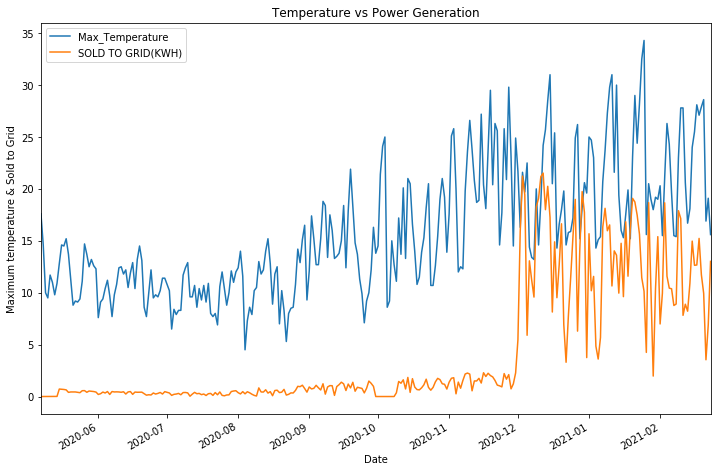

In [23]:
# Hypothesis: To see if power generation is more when temperature is high:
fig, ax = plt.subplots(figsize=(12, 8))
dfinal_temp.plot(x = "Date", y = ["Max_Temperature", "SOLD TO GRID(KWH)"], kind = "line", ax = ax)
# Labels
plt.title("Temperature vs Power Generation")
plt.xlabel('Date')
plt.ylabel('Maximum temperature & Sold to Grid')
plt.show()

In [24]:
# Creating dataframe just for three months
df_Dec = dfinal_temp[dfinal_temp['Date'].dt.month == 12]
df_Jan = dfinal_temp[dfinal_temp['Date'].dt.month == 1]
df_Feb = dfinal_temp[dfinal_temp['Date'].dt.month == 2]
Dec_Jan_Feb = pd.concat([df_Dec, df_Jan, df_Feb], join='outer',ignore_index = True)
Dec_Jan_Feb

,Date,CONSUMPTION(KWH),SOLD TO GRID(KWH),year_month,Max_Temperature
0,2020-12-01,1.96,5.47,2020-12,21.7
1,2020-12-02,2.56,15.90,2020-12,16.3
2,2020-12-03,1.26,21.23,2020-12,21.6
3,2020-12-04,1.43,19.43,2020-12,19.7
4,2020-12-05,1.22,5.90,2020-12,22.5
...,...,...,...,...,...
80,2021-02-19,3.66,11.73,2021-02,27.9
81,2021-02-20,3.04,9.94,2021-02,28.6
82,2021-02-21,2.54,3.54,2021-02,16.9
83,2021-02-22,3.43,6.92,2021-02,19.1


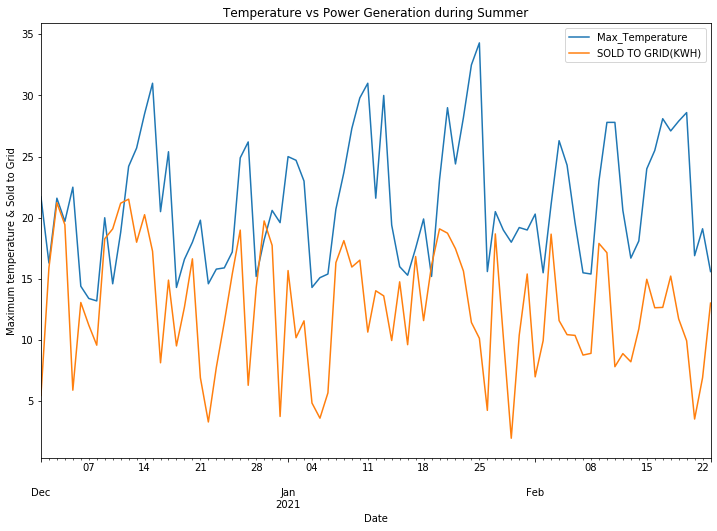

In [25]:
# Observing data during summer:
fig, ax = plt.subplots(figsize=(12, 8))
Dec_Jan_Feb.plot(x = "Date", y = ["Max_Temperature", "SOLD TO GRID(KWH)"], kind = "line", ax = ax)
# Labels
plt.title("Temperature vs Power Generation during Summer")
plt.xlabel('Date')
plt.ylabel('Maximum temperature & Sold to Grid')
plt.show()

In [26]:
#http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_nccObsCode=193&p_display_type=dailyDataFile&p_startYear=2020&p_c=-1488228804&p_stn_num=086261
#Solar Exposure Dataset
se_may = pd.read_csv('SE/May_2020.csv',error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Solar_Exposure"])
print(se_may.head())

se_jun = pd.read_csv('SE/June_2020.csv',error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Solar_Exposure"])
print(se_jun.head())

se_jul = pd.read_csv('SE/July_2020.csv',error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Solar_Exposure"])
print(se_jul.head())

se_aug = pd.read_csv('SE/Aug_2020.csv',error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Solar_Exposure"])
print(se_aug.head())

se_sep = pd.read_csv('SE/Sept_2020.csv',error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Solar_Exposure"])
print(se_sep.head())

se_oct = pd.read_csv('SE/Oct_2020.csv',error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Solar_Exposure"])
print(se_oct.head())

se_nov = pd.read_csv('SE/Nov_2020.csv',error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Solar_Exposure"])
print(se_nov.head())

se_dec = pd.read_csv('SE/Dec_2020.csv',error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Solar_Exposure"])
print(se_dec.head())

se_jan = pd.read_csv('SE/Jan_2021.csv',error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Solar_Exposure"])
print(se_jan.head())

se_feb = pd.read_csv('SE/Feb_2021.csv',error_bad_lines=False, warn_bad_lines=True, names = ["Date", "Solar_Exposure"])
print(se_feb.head())

   Date  Solar_Exposure
0     1             1.1
1     2             1.6
2     3             1.9
3     4             1.8
4     5             3.3
   Date  Solar_Exposure
0     1             0.8
1     2             1.4
2     3             1.8
3     4             2.5
4     5             2.6
   Date  Solar_Exposure
0     1             2.4
1     2             1.8
2     3             1.1
3     4             1.0
4     5             1.2
   Date  Solar_Exposure
0     1             3.1
1     2             3.2
2     3             2.8
3     4             2.0
4     5             2.3
   Date  Solar_Exposure
0     1             4.4
1     2             3.8
2     3             3.6
3     4             4.0
4     5             4.0
   Date  Solar_Exposure
0     1             5.5
1     2             6.1
2     3             5.9
3     4             3.4
4     5             2.1
   Date  Solar_Exposure
0     1             5.7
1     2             7.4
2     3             7.3
3     4             1.8
4     5         

In [27]:
# Adding prefix to date column
se_may['Date'] = '2020-05-' + se_may['Date'].astype(str)
print(se_may.head())
se_jun['Date'] = '2020-06-' + se_jun['Date'].astype(str)
print(se_jun.head())
se_jul['Date'] = '2020-07-' + se_jul['Date'].astype(str)
print(se_jul.head())
se_aug['Date'] = '2020-08-' + se_aug['Date'].astype(str)
print(se_aug.head())
se_sep['Date'] = '2020-09-' + se_sep['Date'].astype(str)
print(se_sep.head())
se_oct['Date'] = '2020-10-' + se_oct['Date'].astype(str)
print(se_oct.head())
se_nov['Date'] = '2020-11-' + se_nov['Date'].astype(str)
print(se_nov.head())
se_dec['Date'] = '2020-12-' + se_dec['Date'].astype(str)
print(se_dec.head())
se_jan['Date'] = '2021-01-' + se_jan['Date'].astype(str)
print(se_jan.head())
se_feb['Date'] = '2021-02-' + se_feb['Date'].astype(str)
print(se_feb.head())

        Date  Solar_Exposure
0  2020-05-1             1.1
1  2020-05-2             1.6
2  2020-05-3             1.9
3  2020-05-4             1.8
4  2020-05-5             3.3
        Date  Solar_Exposure
0  2020-06-1             0.8
1  2020-06-2             1.4
2  2020-06-3             1.8
3  2020-06-4             2.5
4  2020-06-5             2.6
        Date  Solar_Exposure
0  2020-07-1             2.4
1  2020-07-2             1.8
2  2020-07-3             1.1
3  2020-07-4             1.0
4  2020-07-5             1.2
        Date  Solar_Exposure
0  2020-08-1             3.1
1  2020-08-2             3.2
2  2020-08-3             2.8
3  2020-08-4             2.0
4  2020-08-5             2.3
        Date  Solar_Exposure
0  2020-09-1             4.4
1  2020-09-2             3.8
2  2020-09-3             3.6
3  2020-09-4             4.0
4  2020-09-5             4.0
        Date  Solar_Exposure
0  2020-10-1             5.5
1  2020-10-2             6.1
2  2020-10-3             5.9
3  2020-10-4  

In [28]:
# Converting to date time format for column Date:
se_may["Date"] = pd.to_datetime(se_may["Date"])
print(se_may.dtypes)
se_jun["Date"] = pd.to_datetime(se_jun["Date"])
print(se_jun.dtypes)
se_jul["Date"] = pd.to_datetime(se_jul["Date"])
print(se_jul.dtypes)
se_aug["Date"] = pd.to_datetime(se_aug["Date"])
print(se_aug.dtypes)
se_sep["Date"] = pd.to_datetime(se_sep["Date"])
print(se_sep.dtypes)
se_oct["Date"] = pd.to_datetime(se_oct["Date"])
print(se_oct.dtypes)
se_nov["Date"] = pd.to_datetime(se_nov["Date"])
print(se_nov.dtypes)
se_dec["Date"] = pd.to_datetime(se_dec["Date"])
print(se_dec.dtypes)
se_jan["Date"] = pd.to_datetime(se_jan["Date"])
print(se_jan.dtypes)
se_feb["Date"] = pd.to_datetime(se_feb["Date"])
print(se_feb.dtypes)

Date              datetime64[ns]
Solar_Exposure           float64
dtype: object
Date              datetime64[ns]
Solar_Exposure           float64
dtype: object
Date              datetime64[ns]
Solar_Exposure           float64
dtype: object
Date              datetime64[ns]
Solar_Exposure           float64
dtype: object
Date              datetime64[ns]
Solar_Exposure           float64
dtype: object
Date              datetime64[ns]
Solar_Exposure           float64
dtype: object
Date              datetime64[ns]
Solar_Exposure           float64
dtype: object
Date              datetime64[ns]
Solar_Exposure           float64
dtype: object
Date              datetime64[ns]
Solar_Exposure           float64
dtype: object
Date              datetime64[ns]
Solar_Exposure           float64
dtype: object


In [29]:
# Merging all the solar exposure dataframes into a single dataframe:
df_solar = pd.concat([se_may,se_jun,se_jul,se_aug,se_sep,se_oct,se_nov,se_dec,se_jan,se_feb], join='outer',ignore_index = True)
print(df_solar)
print(df_solar.shape)
print(df_solar.info())

          Date  Solar_Exposure
0   2020-05-01             1.1
1   2020-05-02             1.6
2   2020-05-03             1.9
3   2020-05-04             1.8
4   2020-05-05             3.3
..         ...             ...
298 2021-02-24             6.3
299 2021-02-25             5.5
300 2021-02-26             4.3
301 2021-02-27             3.4
302 2021-02-28             6.5

[303 rows x 2 columns]
(303, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
Date              303 non-null datetime64[ns]
Solar_Exposure    303 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.9 KB
None


In [30]:
dfinal_se = df.merge(df_solar, on = "Date", how = 'inner')
dfinal_se

,Date,CONSUMPTION(KWH),SOLD TO GRID(KWH),year_month,Solar_Exposure
0,2020-05-07,0.29,0.00,2020-05,1.9
1,2020-05-08,0.34,0.00,2020-05,2.9
2,2020-05-09,0.41,0.00,2020-05,1.3
3,2020-05-10,0.52,0.00,2020-05,2.7
4,2020-05-11,0.35,0.00,2020-05,2.2
...,...,...,...,...,...
287,2021-02-19,3.66,11.73,2021-02,7.1
288,2021-02-20,3.04,9.94,2021-02,3.8
289,2021-02-21,2.54,3.54,2021-02,1.3
290,2021-02-22,3.43,6.92,2021-02,2.7


In [31]:
# Checking for null values:
print(dfinal_se.isnull().sum())

Date                 0
CONSUMPTION(KWH)     0
SOLD TO GRID(KWH)    0
year_month           0
Solar_Exposure       0
dtype: int64


Text(0, 0.5, 'Solar_Exposure')

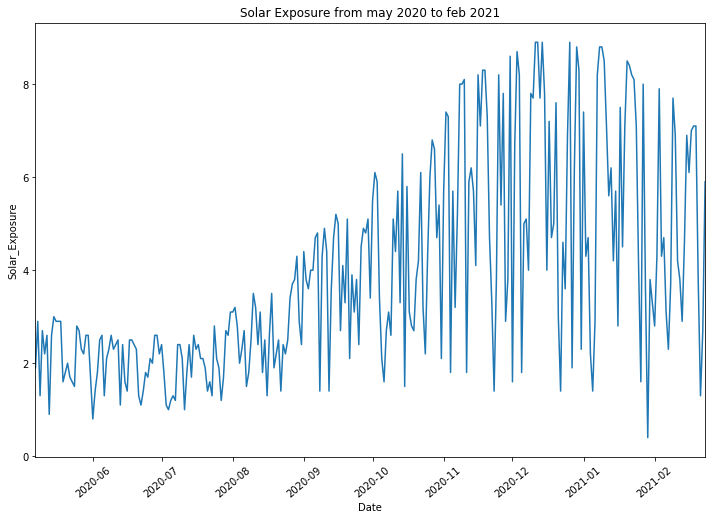

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(dfinal_se["Date"], dfinal_se['Solar_Exposure'])

# X-axis
plt.setp(ax.get_xticklabels(), rotation=40)
ax.set_xlim(dfinal_se["Date"].values[0], dfinal_se["Date"].values[-1])

# Labels
ax.set_title("Solar Exposure from may 2020 to feb 2021")
ax.set_xlabel('Date')
ax.set_ylabel('Solar_Exposure')

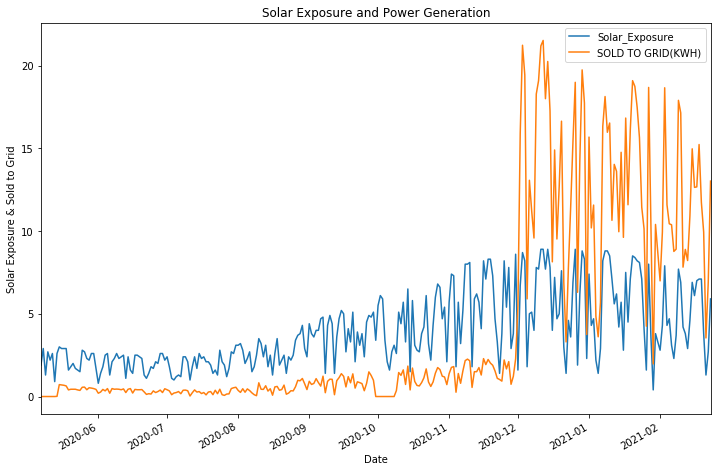

In [33]:
# Hypothesis: To see if power generation is more when solar exposure is high:
fig, ax = plt.subplots(figsize=(12, 8))
dfinal_se.plot(x = "Date", y = ["Solar_Exposure", "SOLD TO GRID(KWH)"], kind = "line", ax = ax)
# Labels
plt.title("Solar Exposure and Power Generation")
plt.xlabel('Date')
plt.ylabel('Solar Exposure & Sold to Grid')
plt.show()

In [34]:
# Creating dataframe just for three months
exp_Dec = dfinal_se[dfinal_se['Date'].dt.month == 12]
exp_Jan = dfinal_se[dfinal_se['Date'].dt.month == 1]
exp_Feb = dfinal_se[dfinal_se['Date'].dt.month == 2]
Dec_Jan_Feb_exp = pd.concat([exp_Dec, exp_Jan, exp_Feb], join='outer',ignore_index = True)
Dec_Jan_Feb_exp

,Date,CONSUMPTION(KWH),SOLD TO GRID(KWH),year_month,Solar_Exposure
0,2020-12-01,1.96,5.47,2020-12,1.6
1,2020-12-02,2.56,15.90,2020-12,6.7
2,2020-12-03,1.26,21.23,2020-12,8.7
3,2020-12-04,1.43,19.43,2020-12,8.2
4,2020-12-05,1.22,5.90,2020-12,1.8
...,...,...,...,...,...
79,2021-02-19,3.66,11.73,2021-02,7.1
80,2021-02-20,3.04,9.94,2021-02,3.8
81,2021-02-21,2.54,3.54,2021-02,1.3
82,2021-02-22,3.43,6.92,2021-02,2.7


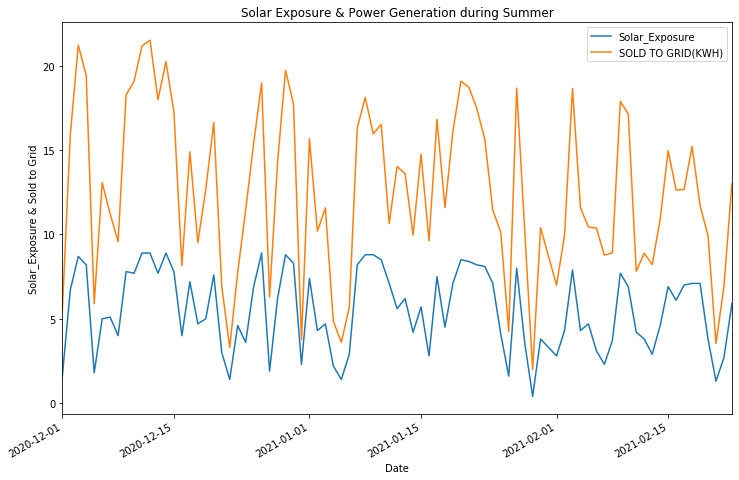

In [35]:
# Observing data during summer:
fig, ax = plt.subplots(figsize=(12, 8))
Dec_Jan_Feb_exp.plot(x = "Date", y = ["Solar_Exposure", "SOLD TO GRID(KWH)"], kind = "line", ax = ax)
# Labels
plt.title("Solar Exposure & Power Generation during Summer")
plt.xlabel('Date')
plt.ylabel('Solar_Exposure & Sold to Grid')
plt.show()

In [36]:
# Creating dataframe just for three months
exp_June = dfinal_se[dfinal_se['Date'].dt.month == 6]
exp_July = dfinal_se[dfinal_se['Date'].dt.month == 7]
exp_Aug = dfinal_se[dfinal_se['Date'].dt.month == 8]
June_July_Aug_exp = pd.concat([exp_June, exp_July, exp_Aug], join='outer',ignore_index = True)
June_July_Aug_exp

,Date,CONSUMPTION(KWH),SOLD TO GRID(KWH),year_month,Solar_Exposure
0,2020-06-01,0.27,0.20,2020-06,0.8
1,2020-06-02,0.32,0.27,2020-06,1.4
2,2020-06-03,0.27,0.43,2020-06,1.8
3,2020-06-04,4.22,0.34,2020-06,2.5
4,2020-06-05,0.26,0.48,2020-06,2.6
...,...,...,...,...,...
87,2020-08-27,14.17,0.98,2020-08,3.7
88,2020-08-28,11.75,0.95,2020-08,3.8
89,2020-08-29,7.53,1.09,2020-08,4.3
90,2020-08-30,5.96,0.77,2020-08,2.9


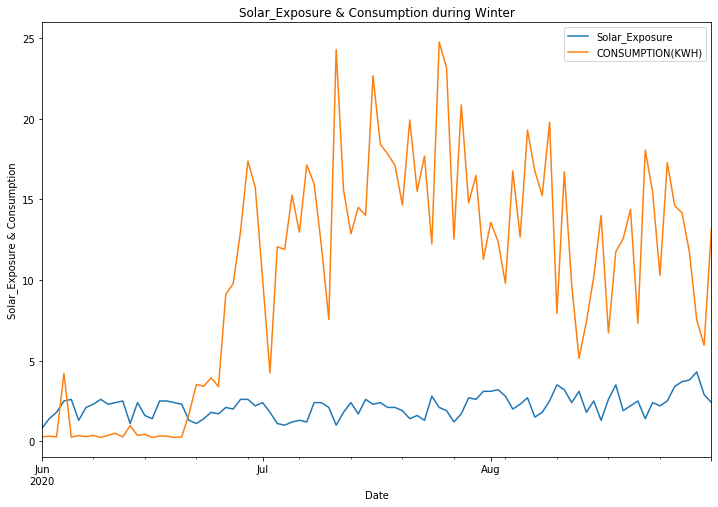

In [37]:
# Observing data during Winter(June-Aug):
fig, ax = plt.subplots(figsize=(12, 8))
June_July_Aug_exp.plot(x = "Date", y = ["Solar_Exposure", "CONSUMPTION(KWH)"], kind = "line", ax = ax)
# Labels
plt.title("Solar_Exposure & Consumption during Winter")
plt.xlabel('Date')
plt.ylabel('Solar_Exposure & Consumption')
plt.show()

#Rainfall


In [38]:
#Rainfall Dataset
df_rainfall_20 = pd.read_csv("Rainfall/Rainfall_2020_Data.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_rainfall_20.head())
print("====================================================================================================================")

df_rainfall_21 = pd.read_csv("Rainfall/Rainfall_2021_Data.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_rainfall_21.head())
print("====================================================================================================================")


  Product code  Bureau of Meteorology station number  Year  Month  Day  \
0   IDCJAC0009                                 86299  2020      1    1   
1   IDCJAC0009                                 86299  2020      1    2   
2   IDCJAC0009                                 86299  2020      1    3   
3   IDCJAC0009                                 86299  2020      1    4   
4   IDCJAC0009                                 86299  2020      1    5   

   Rainfall amount (millimetres)  \
0                            0.0   
1                            0.0   
2                            0.0   
3                            0.0   
4                            4.8   

   Period over which rainfall was measured (days) Quality  
0                                             NaN       Y  
1                                             NaN       Y  
2                                             NaN       Y  
3                                             NaN       Y  
4                                     

In [39]:
df_rainfall_20.shape

(366, 8)

In [40]:
df_rainfall_21.shape

(90, 8)

In [41]:
# dropping unnecessary columns from 2020
df_rainfall_20.drop(["Product code", "Bureau of Meteorology station number","Period over which rainfall was measured (days)","Quality"],axis = 1, inplace = True)
df_rainfall_20

,Year,Month,Day,Rainfall amount (millimetres)
0,2020,1,1,0.0
1,2020,1,2,0.0
2,2020,1,3,0.0
3,2020,1,4,0.0
4,2020,1,5,4.8
...,...,...,...,...
361,2020,12,27,0.0
362,2020,12,28,0.0
363,2020,12,29,0.0
364,2020,12,30,0.0


In [42]:
# dropping columns from 2021
df_rainfall_21.drop(["Product code", "Bureau of Meteorology station number","Period over which rainfall was measured (days)","Quality"],axis = 1, inplace = True)
df_rainfall_21

,Year,Month,Day,Rainfall amount (millimetres)
0,2021,1,1,0.0
1,2021,1,2,0.0
2,2021,1,3,8.2
3,2021,1,4,5.8
4,2021,1,5,19.6
...,...,...,...,...
85,2021,3,27,4.2
86,2021,3,28,1.4
87,2021,3,29,0.0
88,2021,3,30,0.0


In [43]:
# dropping values from the 1 to 4 months in 2020
New20 = df_rainfall_20[ (df_rainfall_20['Month'] >= 1) & (df_rainfall_20['Month'] <= 4) ].index
df_rainfall_20.drop(New20 , inplace=True)
df_rainfall_20

,Year,Month,Day,Rainfall amount (millimetres)
121,2020,5,1,16.8
122,2020,5,2,8.6
123,2020,5,3,10.8
124,2020,5,4,1.8
125,2020,5,5,0.2
...,...,...,...,...
361,2020,12,27,0.0
362,2020,12,28,0.0
363,2020,12,29,0.0
364,2020,12,30,0.0


In [44]:
# dropping values from the 3 to 12 months in 2021
New21 = df_rainfall_21[(df_rainfall_21['Month'] > 2) ].index
df_rainfall_21.drop(New21 , inplace=True)
df_rainfall_21

,Year,Month,Day,Rainfall amount (millimetres)
0,2021,1,1,0.0
1,2021,1,2,0.0
2,2021,1,3,8.2
3,2021,1,4,5.8
4,2021,1,5,19.6
5,2021,1,6,0.0
6,2021,1,7,0.0
7,2021,1,8,0.0
8,2021,1,9,0.0
9,2021,1,10,0.0


In [45]:
#combined two rainfall dataset
df_combined = pd.concat([df_rainfall_20,df_rainfall_21])

In [46]:
# finding NaN values 
print(df_combined.isnull().sum())

Year                             0
Month                            0
Day                              0
Rainfall amount (millimetres)    1
dtype: int64


In [47]:
#filling missing value with 0
df_rainfall= df_combined.fillna(0)

In [48]:
# finding NaN values 
print(df_rainfall.isnull().sum())

Year                             0
Month                            0
Day                              0
Rainfall amount (millimetres)    0
dtype: int64


In [49]:
#combined year month and day into one column read date
df_rainfall["Date"] = pd.to_datetime(df_rainfall[["Year", "Month", "Day"]])

In [50]:
df_rainfall.drop(['Year', 'Month', 'Day'], axis=1,inplace=True)
df_rainfall

,Rainfall amount (millimetres),Date
121,16.8,2020-05-01
122,8.6,2020-05-02
123,10.8,2020-05-03
124,1.8,2020-05-04
125,0.2,2020-05-05
...,...,...
54,0.0,2021-02-24
55,0.0,2021-02-25
56,0.4,2021-02-26
57,0.0,2021-02-27


In [51]:
df_rainfall.dtypes

Rainfall amount (millimetres)           float64
Date                             datetime64[ns]
dtype: object

In [52]:
df.dtypes

Date                 datetime64[ns]
CONSUMPTION(KWH)            float64
SOLD TO GRID(KWH)           float64
year_month                   object
dtype: object

In [53]:
df_merged = pd.merge(df,df_rainfall)
df_merged

,Date,CONSUMPTION(KWH),SOLD TO GRID(KWH),year_month,Rainfall amount (millimetres)
0,2020-05-07,0.29,0.00,2020-05,0.0
1,2020-05-08,0.34,0.00,2020-05,0.0
2,2020-05-09,0.41,0.00,2020-05,5.0
3,2020-05-10,0.52,0.00,2020-05,10.2
4,2020-05-11,0.35,0.00,2020-05,2.6
...,...,...,...,...,...
288,2021-02-19,3.66,11.73,2021-02,0.0
289,2021-02-20,3.04,9.94,2021-02,0.0
290,2021-02-21,2.54,3.54,2021-02,0.0
291,2021-02-22,3.43,6.92,2021-02,0.0


In [54]:
#Correlation matrix for sold to grid and rainfall
df_merged[['SOLD TO GRID(KWH)','Rainfall amount (millimetres)']].corr()

,SOLD TO GRID(KWH),Rainfall amount (millimetres)
SOLD TO GRID(KWH),1.000000,-0.108437
Rainfall amount (millimetres),-0.108437,1.000000


In [55]:
#Correlation matrix for whole 
df_merged.corr()

,CONSUMPTION(KWH),SOLD TO GRID(KWH),Rainfall amount (millimetres)
CONSUMPTION(KWH),1.000000,-0.324154,0.048974
SOLD TO GRID(KWH),-0.324154,1.000000,-0.108437
Rainfall amount (millimetres),0.048974,-0.108437,1.000000


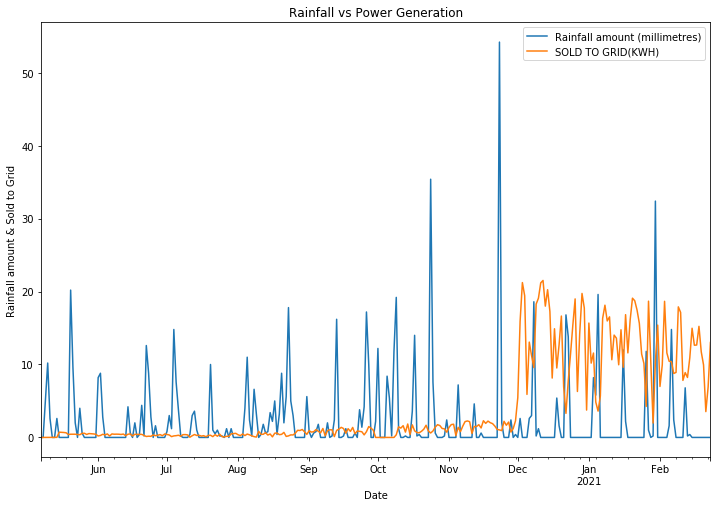

In [56]:
fig, ax = plt.subplots(figsize=(12, 8))
df_merged.plot(x = "Date", y = ["Rainfall amount (millimetres)", "SOLD TO GRID(KWH)"], kind = "line", ax = ax)
# Labels
plt.title("Rainfall vs Power Generation")
plt.xlabel('Date')
plt.ylabel('Rainfall amount & Sold to Grid')
plt.show()

In [57]:
df_2020 = df_merged.loc[(df_merged["Date"]>="2020-06-01")&(df_merged["Date"]<="2020-11-30")]
df_2020

,Date,CONSUMPTION(KWH),SOLD TO GRID(KWH),year_month,Rainfall amount (millimetres)
25,2020-06-01,0.27,0.20,2020-06,8.2
26,2020-06-02,0.32,0.27,2020-06,8.8
27,2020-06-03,0.27,0.43,2020-06,2.8
28,2020-06-04,4.22,0.34,2020-06,0.0
29,2020-06-05,0.26,0.48,2020-06,0.0
...,...,...,...,...,...
203,2020-11-26,1.65,1.67,2020-11,0.0
204,2020-11-27,1.18,2.11,2020-11,0.0
205,2020-11-28,1.60,0.74,2020-11,2.4
206,2020-11-29,1.61,1.22,2020-11,0.0


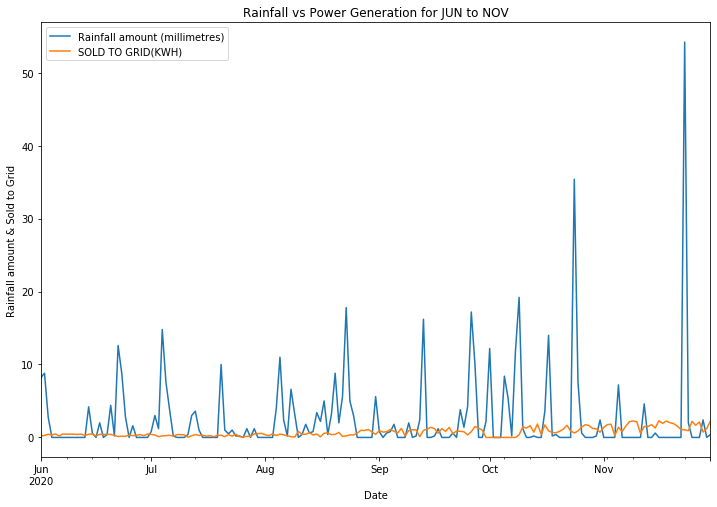

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))
df_2020.plot(x = "Date", y = ["Rainfall amount (millimetres)", "SOLD TO GRID(KWH)"], kind = "line", ax = ax)
# Labels
plt.title("Rainfall vs Power Generation for JUN to NOV")
plt.xlabel('Date')
plt.ylabel('Rainfall amount & Sold to Grid')
plt.show()

In [59]:
df_2021 = df_merged.loc[(df_merged["Date"]>="2020-12-01")&(df_merged["Date"]<="2021-02-28")]
df_2021

,Date,CONSUMPTION(KWH),SOLD TO GRID(KWH),year_month,Rainfall amount (millimetres)
208,2020-12-01,1.96,5.47,2020-12,0.0
209,2020-12-02,2.56,15.90,2020-12,2.6
210,2020-12-03,1.26,21.23,2020-12,0.0
211,2020-12-04,1.43,19.43,2020-12,0.0
212,2020-12-05,1.22,5.90,2020-12,0.0
...,...,...,...,...,...
288,2021-02-19,3.66,11.73,2021-02,0.0
289,2021-02-20,3.04,9.94,2021-02,0.0
290,2021-02-21,2.54,3.54,2021-02,0.0
291,2021-02-22,3.43,6.92,2021-02,0.0


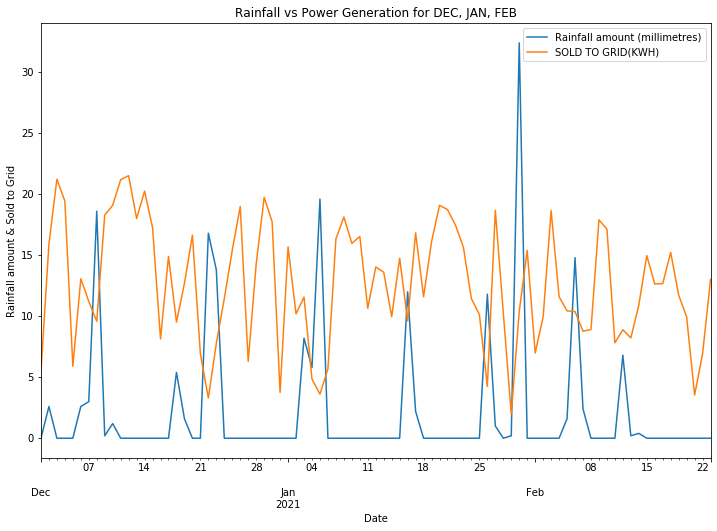

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))
df_2021.plot(x = "Date", y = ["Rainfall amount (millimetres)", "SOLD TO GRID(KWH)"], kind = "line", ax = ax)
# Labels
plt.title("Rainfall vs Power Generation for DEC, JAN, FEB")
plt.xlabel('Date')
plt.ylabel('Rainfall amount & Sold to Grid')
plt.show()

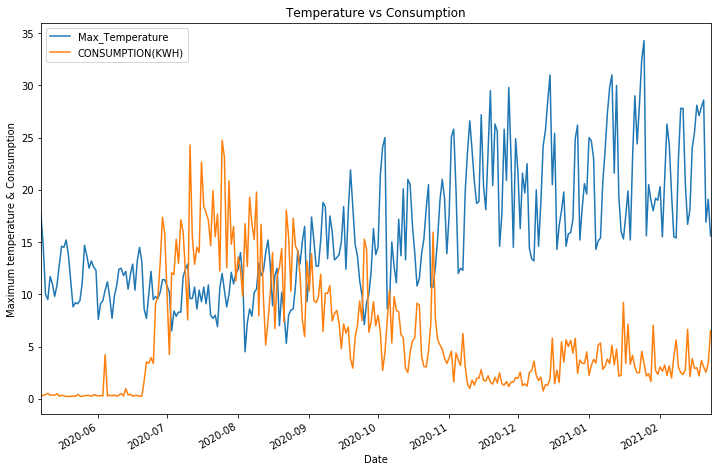

In [61]:
# Hypothesis: To see if Consumption is more when temperature is high:
fig, ax = plt.subplots(figsize=(12, 8))
dfinal_temp.plot(x = "Date", y = ["Max_Temperature", "CONSUMPTION(KWH)"], kind = "line", ax = ax)
# Labels
plt.title("Temperature vs Consumption")
plt.xlabel('Date')
plt.ylabel('Maximum temperature & Consumption')
plt.show()

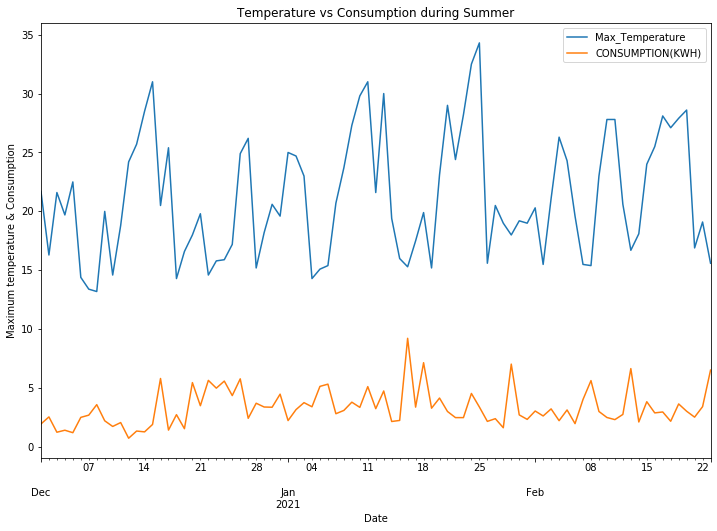

In [62]:
# Observing data during summer:
fig, ax = plt.subplots(figsize=(12, 8))
Dec_Jan_Feb.plot(x = "Date", y = ["Max_Temperature", "CONSUMPTION(KWH)"], kind = "line", ax = ax)
# Labels
plt.title("Temperature vs Consumption during Summer")
plt.xlabel('Date')
plt.ylabel('Maximum temperature & Consumption')
plt.show()

In [63]:
# Creating dataframe just for three months
df_Sept = dfinal_temp[dfinal_temp['Date'].dt.month == 9]
df_Oct = dfinal_temp[dfinal_temp['Date'].dt.month == 10]
df_Nov = dfinal_temp[dfinal_temp['Date'].dt.month == 11]
Sept_Oct_Nov = pd.concat([df_Sept, df_Oct, df_Nov], join='outer',ignore_index = True)
Sept_Oct_Nov

,Date,CONSUMPTION(KWH),SOLD TO GRID(KWH),year_month,Max_Temperature
0,2020-09-01,10.32,0.92,2020-09,12.1
1,2020-09-02,13.90,0.73,2020-09,17.4
2,2020-09-03,9.41,0.79,2020-09,15.2
3,2020-09-04,9.20,1.08,2020-09,12.7
4,2020-09-05,9.76,0.84,2020-09,12.7
...,...,...,...,...,...
86,2020-11-26,1.65,1.67,2020-11,20.9
87,2020-11-27,1.18,2.11,2020-11,29.8
88,2020-11-28,1.60,0.74,2020-11,23.1
89,2020-11-29,1.61,1.22,2020-11,14.5


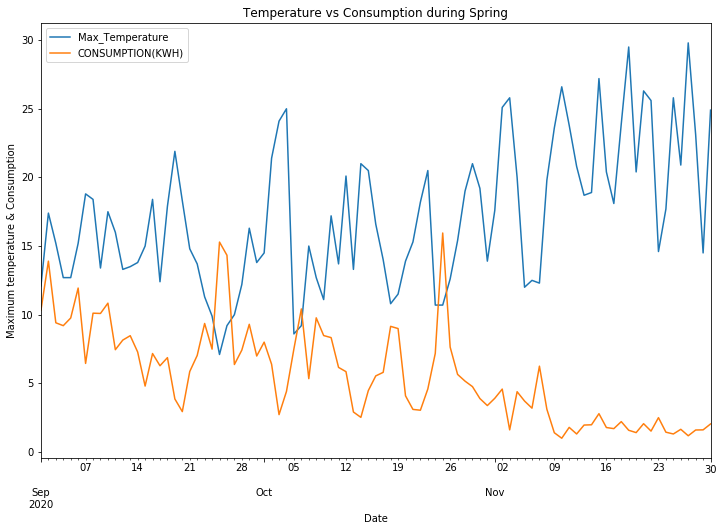

In [64]:
# Observing data during Spring(Sept-Nov):
fig, ax = plt.subplots(figsize=(12, 8))
Sept_Oct_Nov.plot(x = "Date", y = ["Max_Temperature", "CONSUMPTION(KWH)"], kind = "line", ax = ax)
# Labels
plt.title("Temperature vs Consumption during Spring")
plt.xlabel('Date')
plt.ylabel('Maximum temperature & Consumption')
plt.show()

In [65]:
# Creating dataframe just for three months
df_June = dfinal_temp[dfinal_temp['Date'].dt.month == 6]
df_July = dfinal_temp[dfinal_temp['Date'].dt.month == 7]
df_Aug = dfinal_temp[dfinal_temp['Date'].dt.month == 8]
June_July_Aug = pd.concat([df_June, df_July, df_Aug], join='outer',ignore_index = True)
June_July_Aug

,Date,CONSUMPTION(KWH),SOLD TO GRID(KWH),year_month,Max_Temperature
0,2020-06-01,0.27,0.20,2020-06,7.6
1,2020-06-02,0.32,0.27,2020-06,9.1
2,2020-06-03,0.27,0.43,2020-06,9.4
3,2020-06-04,4.22,0.34,2020-06,10.4
4,2020-06-05,0.26,0.48,2020-06,11.2
...,...,...,...,...,...
86,2020-08-27,14.17,0.98,2020-08,14.2
87,2020-08-28,11.75,0.95,2020-08,12.9
88,2020-08-29,7.53,1.09,2020-08,15.1
89,2020-08-30,5.96,0.77,2020-08,16.5


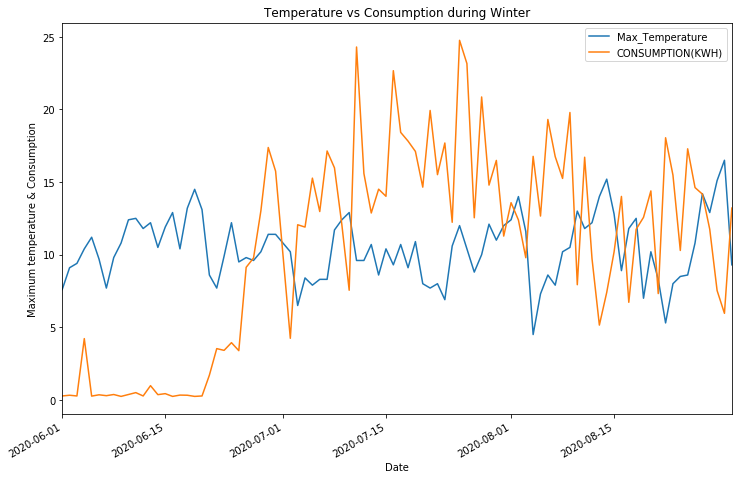

In [66]:
# Observing data during Winter(June-Aug):
fig, ax = plt.subplots(figsize=(12, 8))
June_July_Aug.plot(x = "Date", y = ["Max_Temperature", "CONSUMPTION(KWH)"], kind = "line", ax = ax)
# Labels
plt.title("Temperature vs Consumption during Winter")
plt.xlabel('Date')
plt.ylabel('Maximum temperature & Consumption')
plt.show()